In [1]:
!pip install ipywidgets
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install opencv-python

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn.cluster import KMeans
from IPython.display import display, Image #画像表示
import cv2
%matplotlib inline

# とりあえず使ってみよう

雑に使いたい場合, `interact`を使うのが便利!!
1. なんか`display`する関数をつくる
2. その関数を引数を添えて`interact`に突っ込む

In [3]:
def a_plus_b(a,b):
    print(f"{a}と{b}の和は{a+b}")

interact(a_plus_b,a=10,b=10) #関数の引数の値もいれる必要がある

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=10, description='…

<function __main__.a_plus_b(a, b)>

* `@interact`+関数定義 でも同じことができる
* お好きな方でどうぞ

In [4]:
@interact(a=10,b=10)
def a_plus_b(a,b):
    print(f"{a}と{b}の和は{a+b}")

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=10, description='…

* `display`する関数は文字以外でもOK

In [5]:
#printのかわりにmatplotlibしてみる
def show_lissajous(kappa,delta):
    #リサージュ曲線 : x軸もy軸も単振動しているときにxy平面に描かれる図形. オシロスコープでよくみる
    
    ts=np.linspace(0,np.pi*2*5,1000)#本来は[0,∞]が望ましいが面倒なので5周期だけ
    xs=np.cos(ts)
    ys=np.sin(ts*kappa + delta)

    plt.plot(xs,ys)
    plt.axis('equal')
    plt.show()

interact(show_lissajous,kappa=1.0,delta=np.pi)

interactive(children=(FloatSlider(value=1.0, description='kappa', max=3.0, min=-1.0), FloatSlider(value=3.1415…

<function __main__.show_lissajous(kappa, delta)>

In [6]:
@interact(kappa=1,delta=np.pi*2)
def show_lissajous(kappa,delta):
    #リサージュ曲線 : x軸もy軸も単振動しているときにxy平面に描かれる図形. オシロスコープでよくみる
    
    ts=np.linspace(0,np.pi*2*5,1000)#本来は[0,∞]が望ましいが面倒なので5周期だけ
    xs=np.cos(ts)
    ys=np.sin(ts*kappa + delta)

    plt.plot(xs,ys)
    plt.axis('equal')
    plt.show()

interactive(children=(IntSlider(value=1, description='kappa', max=3, min=-1), FloatSlider(value=6.283185307179…

# 入れる変数について

* `interact`では入れる変数の型によって適宜値を決めるオブジェクトが作られる
  * `int`,`float`:スライダー
  * `bool`:ボタン
  * `string`:入力欄

In [7]:
def var_type(x_int,x_float,x_bool,x_str):
    print(f"x_int:{x_int}")
    print(f"x_float:{x_float}")
    print(f"x_bool:{x_bool}")
    print(f"x_str:{x_str}")

interact(var_type,x_int=1,x_float=1.0,x_bool=True,x_str="吾輩は猫である")

interactive(children=(IntSlider(value=1, description='x_int', max=3, min=-1), FloatSlider(value=1.0, descripti…

<function __main__.var_type(x_int, x_float, x_bool, x_str)>

In [8]:
@interact(x_int=1,x_float=1.0,x_bool=True,x_str="吾輩は猫である")
def var_type(x_int,x_float,x_bool,x_str):
    print(f"x_int:{x_int}")
    print(f"x_float:{x_float}")
    print(f"x_bool:{x_bool}")
    print(f"x_str:{x_str}")

interactive(children=(IntSlider(value=1, description='x_int', max=3, min=-1), FloatSlider(value=1.0, descripti…

# スライダーの値域を定める
* `interace`で`int`,`float`変数を渡す際に,タプルを突っ込むと値域を指定できる
  * `(min,max)`のかたちか, `(min,max,step)`の形にするのがよろし
  * 関数の初期値を入れてあげると,スライダーの初期値もそれになる

In [9]:
#intの場合
def show_hypocycloid(a=1,b=1):
    #サイクロイド : 大きな円上を小さな円が転がるときに, 小さな円の一点が作る軌跡
    alpha=(a+b)/b
    ts=np.linspace(0,np.pi*2*5,1000)#本来は[0,∞]が望ましいが面倒なので5周期だけ
    xs=alpha*np.cos(ts)-np.cos(alpha*ts)
    ys=alpha*np.sin(ts)-np.sin(alpha*ts)

    plt.plot(xs,ys)
    plt.axis('equal')
    plt.show()

interact( show_hypocycloid,a=(1,5),b=(1,5) )

interactive(children=(IntSlider(value=1, description='a', max=5, min=1), IntSlider(value=1, description='b', m…

<function __main__.show_hypocycloid(a=1, b=1)>

In [10]:
#intの場合
@interact( a=(-5,5),b=(-5,5) )
def show_hypocycloid(a=1,b=1):
    #サイクロイド : 大きな円上を小さな円が転がるときに, 小さな円の一点が作る軌跡
    alpha=(a+b)/b
    ts=np.linspace(0,np.pi*2*5,1000)#本来は[0,∞]が望ましいが面倒なので5周期だけ
    xs=alpha*np.cos(ts)-np.cos(alpha*ts)
    ys=alpha*np.sin(ts)-np.sin(alpha*ts)

    plt.plot(xs,ys)
    plt.axis('equal')
    plt.show()

interactive(children=(IntSlider(value=1, description='a', max=5, min=-5), IntSlider(value=1, description='b', …

In [11]:
#floatの場合
def show_hypocycloid(alpha=np.pi):
    #サイクロイド : 大きな円上を小さな円が転がるときに, 小さな円の一点が作る軌跡
    ts=np.linspace(0,np.pi*2*10,1000)#本来は[0,∞]が望ましいが面倒なので10周期だけ
    xs=-alpha*np.cos(ts)+np.cos(alpha*ts)
    ys=-alpha*np.sin(ts)+np.sin(alpha*ts)

    plt.axis('equal')
    plt.plot(xs,ys)
    plt.show()

interact( show_hypocycloid,alpha=(-10,10.0,0.01) )

interactive(children=(FloatSlider(value=3.141592653589793, description='alpha', max=10.0, min=-10.0, step=0.01…

<function __main__.show_hypocycloid(alpha=3.141592653589793)>

In [12]:
#floatの場合
@interact( alpha=(-10,10.0,0.01) )
def show_hypocycloid(alpha=np.pi):
    #サイクロイド : 大きな円上を小さな円が転がるときに, 小さな円の一点が作る軌跡
    ts=np.linspace(0,np.pi*2*10,1000)#本来は[0,∞]が望ましいが面倒なので10周期だけ
    xs=-alpha*np.cos(ts)+np.cos(alpha*ts)
    ys=-alpha*np.sin(ts)+np.sin(alpha*ts)

    plt.axis('equal')
    plt.plot(xs,ys)
    plt.show()


interactive(children=(FloatSlider(value=3.141592653589793, description='alpha', max=10.0, min=-10.0, step=0.01…

# 一覧から値を定める
* `interace`で変数を渡す際に,`list`を突っ込むと一覧の中から値を選ぶことができる
* `interace`で変数を渡す際に,`dict`を突っ込むとkey名の中からvalueを選ぶことができる

In [13]:
def show_heartcurve(title="ここにいい感じのタイトルを入れよう",eq_type=1):
    #HeartCurve : https://mathworld.wolfram.com/HeartCurve.html
    #上で出ている愛の形の方程式を切り替えながら描画する
    if eq_type==0:
        ts=np.linspace(-np.pi,np.pi,10000)
        rs=1-np.sin(ts)
        xs=rs*np.cos(ts)
        ys=rs*np.sin(ts)
        plt.plot(xs,ys)
    elif eq_type==1:
        xs=np.linspace(-2,2,1000)
        ys=np.linspace(-2,2,1000)
        X, Y = np.meshgrid(xs,ys)
        Z=(X**2+Y**2-1)**3-X**2*Y**3
        plt.contour(X, Y, Z, [0])
    elif eq_type==2:
        ts=np.linspace(-1,1,10000)
        xs=np.sin(ts)*np.cos(ts)*np.log(np.abs(ts))
        ys=np.abs(ts)**0.3*(np.cos(ts))**0.5
        plt.plot(xs,ys)
    elif eq_type==3:
        xs=np.linspace(-10,10,1000)
        ys=np.linspace(-10,10,1000)
        X, Y = np.meshgrid(xs,ys)
        Z=X**2+( Y-2*(X**2+np.abs(X)-6)/3/(X**2+np.abs(X)+2) )**2
        plt.contour(X, Y, Z,[36])
    elif eq_type==4:
        ts=np.linspace(-np.pi,np.pi,10000)
        rs=2-2*np.sin(ts)+np.sin(ts)*np.sqrt( np.abs( np.cos(ts) ) / ( np.sin(ts)+1.4 ) )
        xs=rs*np.cos(ts)
        ys=rs*np.sin(ts)
        plt.plot(xs,ys)
    elif eq_type==5:
        ts=np.linspace(-np.pi,np.pi,10000)
        xs=16*np.sin(ts)**3
        ys=13*np.cos(ts)-5*np.cos(2*ts)-2*np.cos(3*ts)-np.cos(4*ts)
        plt.plot(xs,ys)
    elif eq_type==6:
        xs=np.linspace(-2,2,1000)
        ys=np.linspace(-2,2,1000)
        X, Y = np.meshgrid(xs,ys)
        Z=X**2+(Y-np.abs(X)**(2/3))**2 #多分mathmaticaの数式誤字ってる
        plt.contour(X, Y, Z, [1])

    plt.axis('equal')
    plt.title(title, fontname="MS Gothic")#豆腐対策
    plt.show()

interact( 
    show_heartcurve,
    title=["ここにいい感じのタイトルを入れよう","このマークはハートといいます","これのモチーフは心臓です","これは愛の形の方程式です","岩野夏樹さんご結婚おめでとう"],
    eq_type={
        "0:cardioid":0,
        "1:陰関数":1,
        "2:H. Dascanio, pers. comm., June 21, 2003":2,
        "3:P. Kuriscak, pers. comm., Feb. 12, 2006":3,
        "4:極座標+媒介変数":4,
        "5:陰関数":5,
        "6:簡単な式":6
    } 
)

interactive(children=(Dropdown(description='title', options=('ここにいい感じのタイトルを入れよう', 'このマークはハートといいます', 'これは愛の方程式で…

<function __main__.show_heartcurve(title='ここにいい感じのタイトルを入れよう', eq_type=1)>

In [64]:
@interact( 
    title=["ここにいい感じのタイトルを入れよう","このマークはハートといいます","これのモチーフは心臓です","これは愛の形の方程式です","岩野夏樹さんご結婚おめでとう"],
    eq_type={
        "0:cardioid":0,
        "1:陰関数":1,
        "2:H. Dascanio, pers. comm., June 21, 2003":2,
        "3:P. Kuriscak, pers. comm., Feb. 12, 2006":3,
        "4:極座標+媒介変数":4,
        "5:陰関数":5,
        "6:簡単な式":6
    } 
)
def show_heartcurve(eq_type=1,title="ここにいい感じのタイトルを入れよう"):
    #HeartCurve : https://mathworld.wolfram.com/HeartCurve.html
    #上で出ている愛の形の方程式を切り替えながら描画する
    if eq_type==0:
        ts=np.linspace(-np.pi,np.pi,10000)
        rs=1-np.sin(ts)
        xs=rs*np.cos(ts)
        ys=rs*np.sin(ts)
        plt.plot(xs,ys)
    elif eq_type==1:
        xs=np.linspace(-2,2,1000)
        ys=np.linspace(-2,2,1000)
        X, Y = np.meshgrid(xs,ys)
        Z=(X**2+Y**2-1)**3-X**2*Y**3
        plt.contour(X, Y, Z, [0])
    elif eq_type==2:
        ts=np.linspace(-1,1,10000)
        xs=np.sin(ts)*np.cos(ts)*np.log(np.abs(ts))
        ys=np.abs(ts)**0.3*(np.cos(ts))**0.5
        plt.plot(xs,ys)
    elif eq_type==3:
        xs=np.linspace(-10,10,1000)
        ys=np.linspace(-10,10,1000)
        X, Y = np.meshgrid(xs,ys)
        Z=X**2+( Y-2*(X**2+np.abs(X)-6)/3/(X**2+np.abs(X)+2) )**2
        plt.contour(X, Y, Z,[36])
    elif eq_type==4:
        ts=np.linspace(-np.pi,np.pi,10000)
        rs=2-2*np.sin(ts)+np.sin(ts)*np.sqrt( np.abs( np.cos(ts) ) / ( np.sin(ts)+1.4 ) )
        xs=rs*np.cos(ts)
        ys=rs*np.sin(ts)
        plt.plot(xs,ys)
    elif eq_type==5:
        ts=np.linspace(-np.pi,np.pi,10000)
        xs=16*np.sin(ts)**3
        ys=13*np.cos(ts)-5*np.cos(2*ts)-2*np.cos(3*ts)-np.cos(4*ts)
        plt.plot(xs,ys)
    elif eq_type==6:
        xs=np.linspace(-2,2,1000)
        ys=np.linspace(-2,2,1000)
        X, Y = np.meshgrid(xs,ys)
        Z=X**2+(Y-np.abs(X)**(2/3))**2 #多分mathmaticaの数式誤字ってる
        plt.contour(X, Y, Z, [1])

    plt.axis('equal')
    plt.title(title, fontname="MS Gothic")#豆腐対策
    plt.show()

interactive(children=(Dropdown(description='eq_type', index=1, options={'0:cardioid': 0, '1:陰関数': 1, '2:H. Das…

# 使用例1:機械学習モデルのパラメータ決定

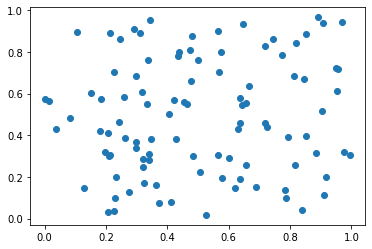

In [15]:
#テキトーに100個点を配置
xs=np.random.rand(100)
ys=np.random.rand(100)
plt.scatter(xs,ys)

In [16]:

def kmeans_and_show(n_clusters=3):
    #kmeansしてその結果を描画する
    cls = KMeans(n_clusters=n_clusters,random_state=0)
    pred=cls.fit_predict(np.c_[xs,ys])
    plt.scatter(xs,ys,c=pred)
    plt.scatter(cls.cluster_centers_[...,0],cls.cluster_centers_[...,1],c="black",s=100) #重心描画
    plt.show()
interact( kmeans_and_show,n_clusters=(1,10) )

interactive(children=(IntSlider(value=3, description='n_clusters', max=10, min=1), Output()), _dom_classes=('w…

<function __main__.kmeans_and_show(n_clusters=3)>

# 使用例2:画像解析のパラメータ決定

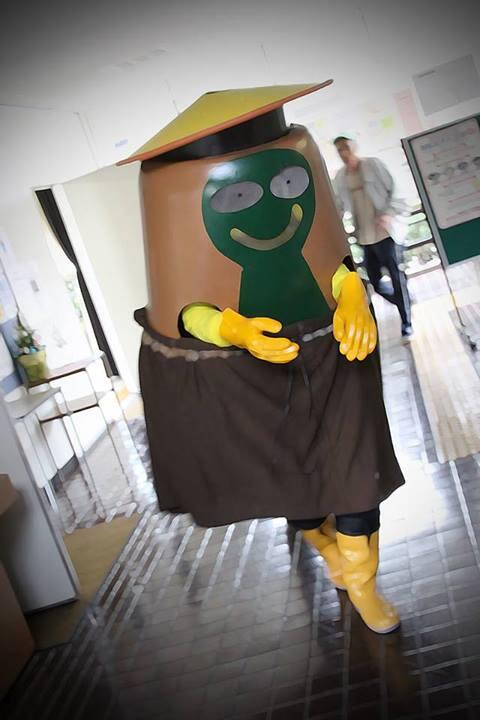

In [17]:
#画像を表示する関数
def imgShow(img,format='.png',scale=1):
    if scale!=1:
        h,w=img.shape[:2]
        img=cv2.resize(img, (int(w*scale+0.5), int(h*scale+0.5)),interpolation=cv2.INTER_NEAREST)
    decoded_bytes = cv2.imencode(format, img)[1].tobytes()
    display(Image(data=decoded_bytes))
img=cv2.imread(r'sample.jpg')#古墳のゆるきゃらの｢大塚ふん子｣
imgShow(img,scale=1)

In [18]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#canny法をつかって画像の輪郭表示
def test_canny(c1,c2,r=255,g=0,b=0,scale=1):
    edges =cv2.Canny(img,c1,c2)
    imgShow(edges,scale=scale)
    img_copy=img.copy()
    img_copy[edges>0]=[b,g,r]
    imgShow(img_copy,scale=scale)


interact(test_canny,c1=(0,1000),c2=(0,1000),scale=(0.1,1.0),r=(0,255),g=(0,255),b=(0,255))

interactive(children=(IntSlider(value=500, description='c1', max=1000), IntSlider(value=500, description='c2',…

<function __main__.test_canny(c1, c2, r=255, g=0, b=0, scale=1)>

# 使用例3:多変数の空間を直感的に理解する
初めて見る多変数な数式は, 直感的に理解しにくい
$$ax^2+by^2+cxy=1$$
`interact`で触ってみると,$a,b,c$がどういう役割の変数かなんとなくわかった気になれたのではないでしょうか……

In [67]:
def view_eclipse(a=1.0,b=1.0,c=0.0):
    xs=np.linspace(-5,5,1000)
    ys=np.linspace(-5,5,1000)
    X, Y = np.meshgrid(xs,ys)
    Z=a*X**2+b*Y**2+c*X*Y
    
    plt.contour(X, Y, Z,[1])
    #plt.colorbar()
    #plt.clim(0,5)
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.axis('equal')
    plt.show()

interact(view_eclipse,a=(-1.0,1.0),b=(-1.0,1.0),c=(-1.0,1.0))

interactive(children=(FloatSlider(value=1.0, description='a', max=1.0, min=-1.0), FloatSlider(value=1.0, descr…

<function __main__.view_eclipse(a=1.0, b=1.0, c=0.0)>

ちなみに上の数式は楕円か双曲線を回転させたものになります(座標変換してみたらわかる).

参考文献
* https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
* https://mathworld.wolfram.com/HeartCurve.html
* https://ja.wikipedia.org/wiki/%E3%83%AA%E3%82%B5%E3%82%B8%E3%83%A5%E3%83%BC%E5%9B%B3%E5%BD%A2
* https://ja.wikipedia.org/wiki/%E3%82%B5%E3%82%A4%E3%82%AF%E3%83%AD%E3%82%A4%E3%83%89
* http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_canny/py_canny.html